[('2019-01-01', 18044, 655319863), ('2019-01-02', 15034, 559163120), ('2019-01-03', 13868, 496806206), ('2019-01-04', 11597, 415187159), ('2019-01-05', 16805, 604089761), ('2019-01-06', 14941, 533057187), ('2019-01-07', 521474, 19322047411), ('2019-01-08', 24768, 905808031), ('2019-01-09', 19123, 699651904), ('2019-01-10', 21716, 825971551), ('2019-01-11', 12290, 455844706), ('2019-01-12', 15773, 579994667), ('2019-01-13', 28845, 1068664357), ('2019-01-14', 22330, 853781027), ('2019-01-15', 12654, 482812870), ('2019-01-16', 14647, 556580908), ('2019-01-17', 10631, 378644890), ('2019-01-18', 7985, 299061641), ('2019-01-19', 10881, 401733740), ('2019-01-20', 7789, 293507793), ('2019-01-21', 10465, 364866575), ('2019-01-22', 7865, 288028096), ('2019-01-23', 120541, 4536658352), ('2019-01-24', 12085, 448626249), ('2019-01-25', 18617, 670977510), ('2019-01-26', 18192, 663210195), ('2019-01-27', 20496, 750673995), ('2019-01-28', 243244, 9175326411), ('2019-01-29', 17621, 644659054), ('2019-0

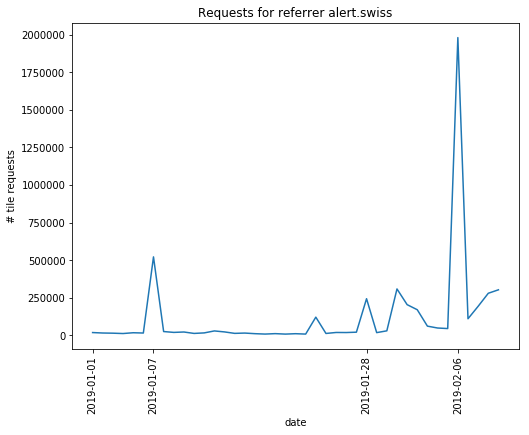

In [17]:
import psycopg2
import osgeo.ogr
import shapely
import shapely.wkt
import geopandas as gpd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]


DB_HOST = "10.220.5.189"
DB_PORT = 5432
DB_USER = "www-data"
DB_PASSWORD = "www-data"
DB_DATABASE = "toposhop_prod"
Q = """select date,request,bytes 
FROM tbl_geoservice_wmts_usage 
WHERE referer like %s AND
date >= '2019-01-01' and 
date < '2019-02-15'
ORDER BY date asc"""

connection = psycopg2.connect(database=DB_DATABASE, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT)
cursor = connection.cursor()
cursor.execute(Q, ('alert.swiss',))
entry = cursor.fetchall()
connection.close()
print(entry)

days = np.arange(len(entry))
dates = np.array([e[0] for e in entry])
request = np.array([e[1] for e in entry])

plt.plot(dates, request)
plt.title('Requests for referrer alert.swiss')
plt.xticks([0, 6, 27, 36], [dates[0], dates[6], dates[27], dates[36]], rotation=90)
plt.ylabel("# tile requests")
plt.xlabel("date")
plt.savefig('out/alert.swiss.pdf', bbox_inches='tight')
plt.show()


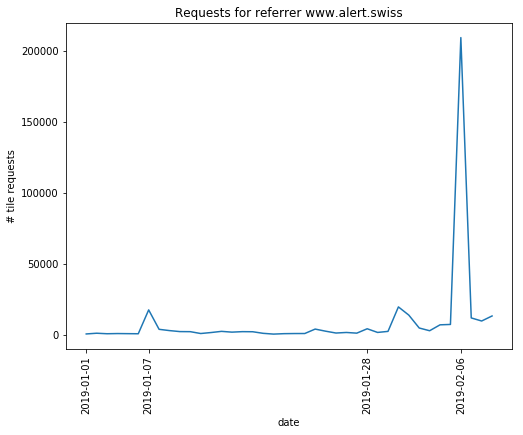

In [13]:
connection = psycopg2.connect(database=DB_DATABASE, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT)
cursor = connection.cursor()
cursor.execute(Q, ("www.alert.swiss",))
entry = cursor.fetchall()
connection.close()

days = np.arange(len(entry))
dates = np.array([e[0] for e in entry])
request = np.array([e[1] for e in entry])

plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(dates, request)
plt.title('Requests for referrer www.alert.swiss')
plt.xticks([0, 6, 27, 36], [dates[0], dates[6], dates[27], dates[36]], rotation=90)
plt.ylabel("# tile requests")
plt.xlabel("date")
plt.savefig('out/www.alert.swiss.pdf', bbox_inches='tight')
plt.show()
